In [23]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [25]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [26]:
dataset=pd.get_dummies(dataset, dtype=int ,drop_first=True)

In [27]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [28]:
dataset=dataset.drop("User ID",axis=1)

In [29]:
dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [30]:
dataset["Purchased"].value_counts()


Purchased
0    257
1    143
Name: count, dtype: int64

In [31]:
independent=dataset[["Age","EstimatedSalary","Gender_Male"]]
dependent=dataset["Purchased"]

In [32]:
independent.shape

(400, 3)

In [33]:
dependent

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [34]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
        

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
y_pred = classifier.predict(X_test)
        

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
        

In [38]:
print(cm)

[[78  7]
 [ 6 43]]


In [39]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

In [40]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        85
           1       0.86      0.88      0.87        49

    accuracy                           0.90       134
   macro avg       0.89      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134



In [41]:
age_input=int(input("Age:"))
salary_input=float(input("Salary:"))
sex_male_input=int(input("Sex Male 0 or 1:"))

In [42]:
cp = classifier.predict([[age_input, salary_input, sex_male_input]])
if cp[0] == 1:
    print("The person is likely to purchase the product\n")
else:
    print("The person is unlikely to purchase the product\n")

The person is likely to purchase the product



/home/deehub/JoinDeeHub/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/home/deehub/JoinDeeHub/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/tmp/ipykernel_28379/1343187208.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


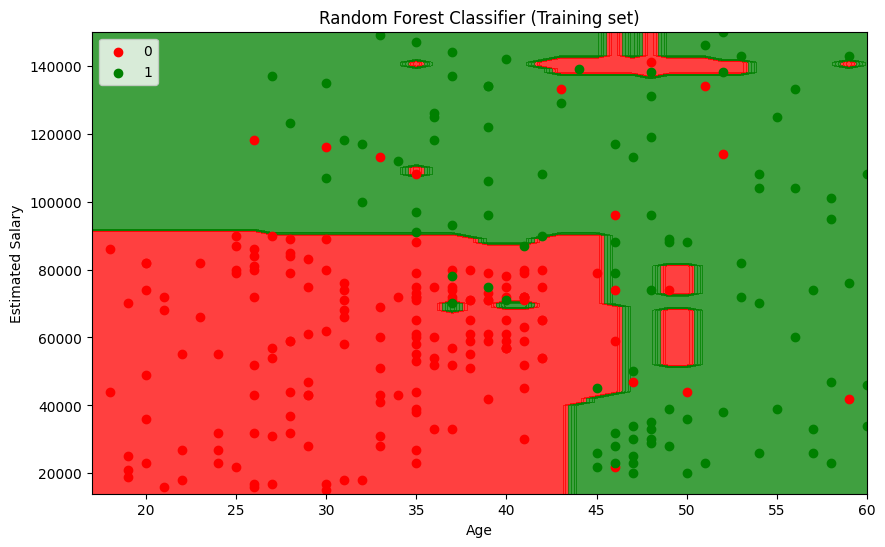

In [43]:
# Visualising the Training set results (only Age and EstimatedSalary, fix Gender_Male to 1)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Fix Gender_Male to 1 for visualization
fixed_gender = 1

X1, X2 = np.meshgrid(
    np.arange(start=X_set['Age'].min() - 1, stop=X_set['Age'].max() + 1, step=1),
    np.arange(start=X_set['EstimatedSalary'].min() - 1000, stop=X_set['EstimatedSalary'].max() + 1000, step=1000)
)

# Prepare the grid for prediction
grid_points = np.c_[
    X1.ravel(), 
    X2.ravel(), 
    np.full(X1.ravel().shape, fixed_gender)
]

Z = classifier.predict(grid_points)
Z = Z.reshape(X1.shape)

plt.figure(figsize=(10,6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set.loc[y_set == j, 'Age'], 
        X_set.loc[y_set == j, 'EstimatedSalary'],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [44]:
dir(clf_report)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri